In [6]:
import pandas as pd

# Carica il dataset preprocessato
df = pd.read_csv('../dataset/amazon_clean.csv')

# Mostra struttura dati rilevanti
df[['product_name', 'category', 'discounted_price', 'actual_price', 'rating', 'rating_count']].head()

,product_name,category,discounted_price,actual_price,rating,rating_count
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,4.2,24269.0
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,4.0,43994.0
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,3.9,7928.0
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,4.2,94363.0
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,4.2,16905.0


In [7]:
from sklearn.preprocessing import StandardScaler

# Selezione feature quantitative
features = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'real_discount']
X = df[features]

# Standardizzazione
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

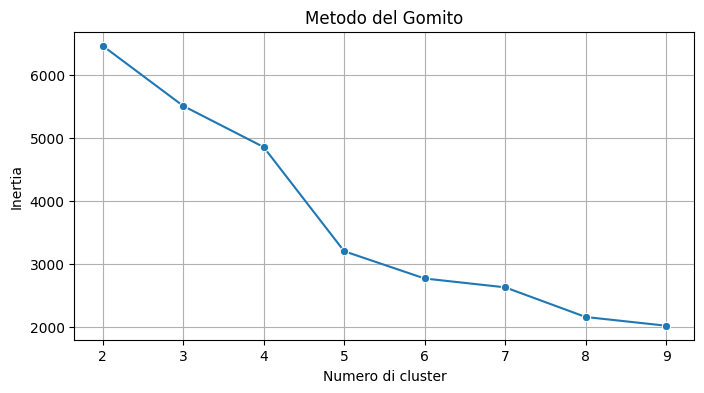

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Metodo del gomito per scegliere il numero di cluster
inertia = []
k_range = range(2, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
sns.lineplot(x=k_range, y=inertia, marker='o')
plt.title("Metodo del Gomito")
plt.xlabel("Numero di cluster")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [10]:
cluster_summary = df.groupby('cluster')[features].mean().round(2)
display(cluster_summary)

,discounted_price,actual_price,discount_percentage,rating,rating_count,real_discount
cluster,,,,,,
0,1182.61,3215.60,61.31,4.22,14476.78,61.32
1,1058.86,2713.58,61.60,3.67,7510.30,61.59
2,1489.34,2602.51,51.51,4.19,241076.11,51.41
3,3378.06,4723.68,24.32,4.15,13733.66,24.31
4,30743.21,47291.48,32.70,4.23,11802.03,32.72


In [11]:
category_dist = df.groupby(['cluster', 'category']).size().unstack(fill_value=0)
category_dist.head()

category,Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|DVICables,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|EthernetCables,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|SATACables,...,"OfficeProducts|OfficePaperProducts|Paper|Stationery|Notebooks,WritingPads&Diaries|CompositionNotebooks","OfficeProducts|OfficePaperProducts|Paper|Stationery|Notebooks,WritingPads&Diaries|Notepads&MemoBooks","OfficeProducts|OfficePaperProducts|Paper|Stationery|Notebooks,WritingPads&Diaries|WireboundNotebooks","OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|BottledInk","OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|FountainPens","OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens","OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens","OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens","OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|StickBallpointPens",Toys&Games|Arts&Crafts|Drawing&PaintingSupplies|ColouringPens&Markers
cluster,,,,,,,,,,,,,,,,,,,,,
0,0,2,0,0,2,1,3,1,2,0,...,0,2,0,0,0,0,0,0,0,0
1,1,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,7,0,4,2,1,2,2,2,3,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


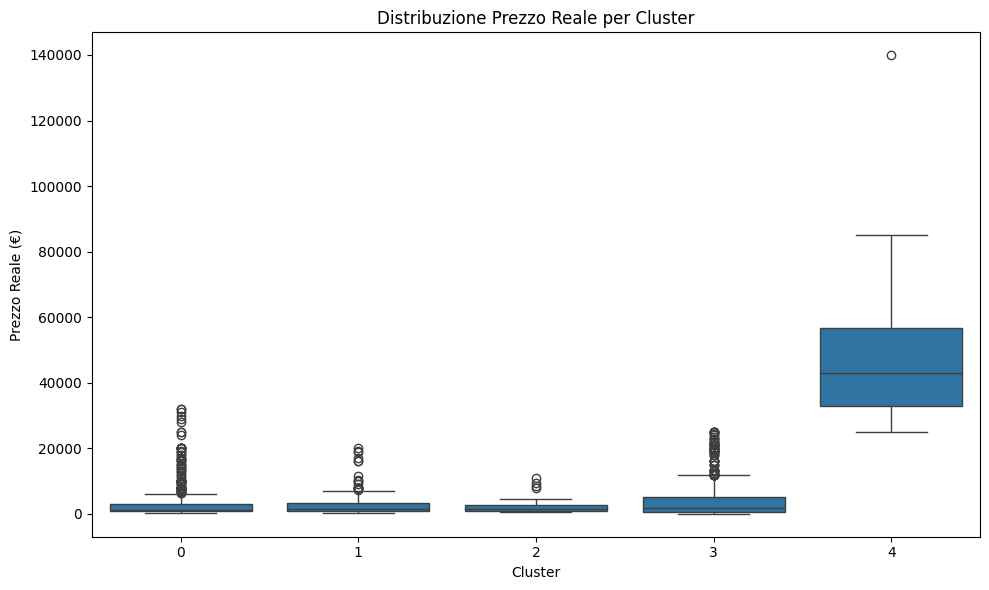

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cluster', y='actual_price')
plt.title('Distribuzione Prezzo Reale per Cluster')
plt.ylabel('Prezzo Reale (€)')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_99398/4009090844.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


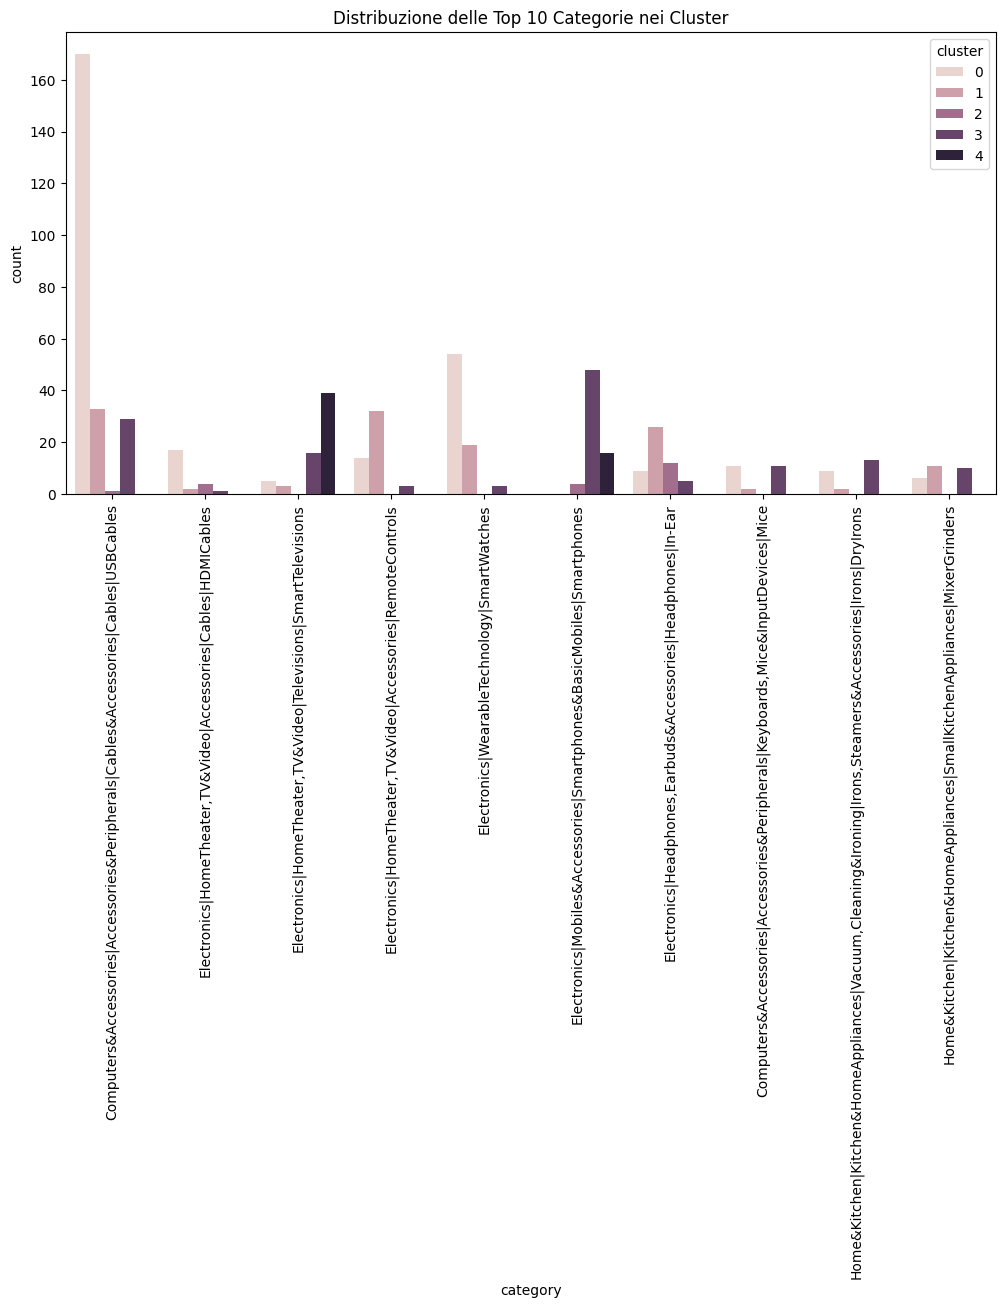

In [13]:
top_categories = df['category'].value_counts().nlargest(10).index
filtered_df = df[df['category'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='category', hue='cluster')
plt.xticks(rotation=90)
plt.title('Distribuzione delle Top 10 Categorie nei Cluster')
plt.tight_layout()
plt.show()

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_99398/1597177784.py:29: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/dantetrabassi/Desktop/amazon_insights_app/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


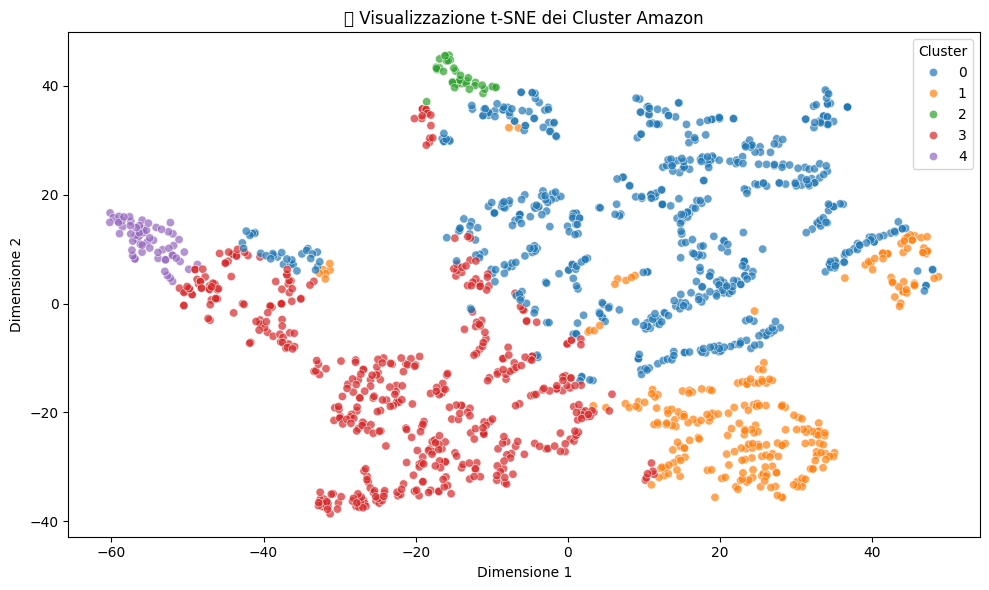

In [14]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 🔄 1. Seleziona solo le feature numeriche da usare per la t-SNE
features = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'real_discount']
X = df[features]

# ⚖️ 2. Standardizza
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔍 3. Applica t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_results = tsne.fit_transform(X_scaled)

# 💾 4. Aggiungi al dataframe
df['tsne_1'] = tsne_results[:, 0]
df['tsne_2'] = tsne_results[:, 1]

# 🎨 5. Visualizza
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tsne_1', y='tsne_2', hue='cluster', palette='tab10', alpha=0.7)
plt.title("📉 Visualizzazione t-SNE dei Cluster Amazon")
plt.xlabel("Dimensione 1")
plt.ylabel("Dimensione 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [15]:
# 🔎 Raccomandazioni basate sul cluster
recommendations = {}

for cluster_id in sorted(df['cluster'].unique()):
    cluster_df = df[df['cluster'] == cluster_id]
    
    top_category = cluster_df['category'].value_counts().idxmax()
    top_product = cluster_df[cluster_df['category'] == top_category].iloc[0]
    
    recommendations[cluster_id] = {
        "categoria": top_category,
        "prodotto": top_product['product_name'],
        "prezzo_scontato": top_product['discounted_price'],
        "link": top_product['product_link']
    }

# 📦 Mostra suggerimenti
for cluster, data in recommendations.items():
    print(f"\n🎯 Cluster {cluster}")
    print(f"🛍️ Categoria suggerita: {data['categoria']}")
    print(f"📦 Prodotto: {data['prodotto']}")
    print(f"💰 Prezzo scontato: ₹{data['prezzo_scontato']}")
    print(f"🔗 Link: {data['link']}")



🎯 Cluster 0
🛍️ Categoria suggerita: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
📦 Prodotto: Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)
💰 Prezzo scontato: ₹399.0
🔗 Link: https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1

🎯 Cluster 1
🛍️ Categoria suggerita: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
📦 Prodotto: Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices
💰 Prezzo scontato: ₹199.0
🔗 Link: https://www.amazon.in/Sounce-iPhone-Charging-Compatible-Devices/dp/B096MSW6CT/ref=sr_1_3?qid=1672909124&s=electronics&sr=1-3

🎯 Cluster 2
🛍️ Categoria suggerita: Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear
📦 Prodotto: JBL C100SI Wi

In [16]:
df.to_csv('../dataset/amazon_clustered.csv', index=False)

In [17]:
def suggerisci_cluster(df, model, prezzo, rating, sconto):
    from sklearn.preprocessing import StandardScaler
    X = df[['discounted_price', 'rating', 'real_discount']]
    scaler = StandardScaler()
    scaler.fit(X)
    input_scaled = scaler.transform([[prezzo, rating, sconto]])
    cluster = model.predict(input_scaled)[0]
    return cluster

In [18]:
import joblib
joblib.dump(kmeans, "models/kmeans_model.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'models/kmeans_model.pkl'